## Jagdeep Singh - Image

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import astropy.io.fits as fits

from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb
from astropy import stats

# Digitized Sky Survey (DSS)

The Digitized Sky Survey is a multiwavelength survey of the sky produced by scanning the photographic Sky Survey plates from the Palomar and UK Schmidt telescopes.

You can download images from the [ESO Online Digitized Sky Survey](http://archive.eso.org/dss/dss)

## Part 1:

- Download a 15 arcmin x 15 acrmin DSS-2-blue FITS image near the [North Galactic Pole](https://en.wikipedia.org/wiki/Galactic_coordinate_system)

- Download a 15 arcmin x 15 acrmin DSS-2-red FITS image near the [Galactic center](https://en.wikipedia.org/wiki/Galactic_coordinate_system).

* Plot the two images with coordinates
* Plot a 5-sigma cut of each of the images
* The images should be nice with labels

In [2]:
ngp_data_file = "./MyData/NGP.fits"
gc_data_file = "./MyData/GC.fits"
ngp_fits = fits.open(ngp_data_file)
gc_fits = fits.open(gc_data_file)

ngp_image_data = ngp_fits[0].data
ngp_image_header = ngp_fits[0].header

gc_image_data = gc_fits[0].data
gc_image_header = gc_fits[0].header

ngp_wcs = WCS(ngp_image_header)
gc_wcs = WCS(gc_image_header)

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


In [3]:
ngp_clip_image = stats.sigma_clip(ngp_image_data, sigma=5, iters=5)
ngp_copy_data = np.copy(ngp_image_data)
ngp_copy_data[~ngp_clip_image.mask] = ngp_image_data.min()

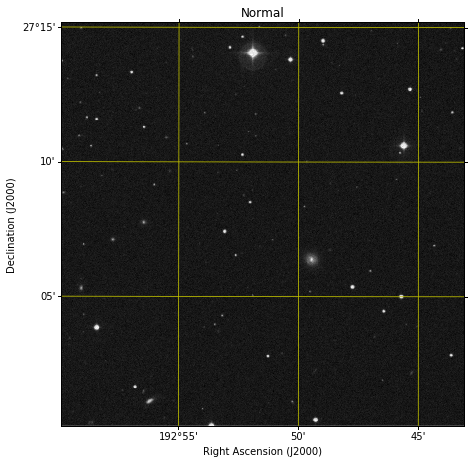

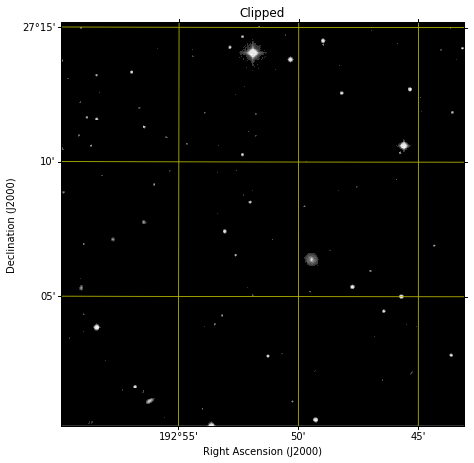

In [4]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection=ngp_wcs)

fig1.set_size_inches(12,6)
fig1.tight_layout()

ax1.set_title("Normal")
ax1.grid(color='y', ls='-')
ax1.set_xlabel('Right Ascension (J2000)')
ax1.set_ylabel('Declination (J2000)')

ax1.imshow(ngp_image_data, origin='lower', cmap=plt.cm.gray);

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection=ngp_wcs)

fig2.set_size_inches(12,6)
fig2.tight_layout()

ax2.set_title("Clipped")
ax2.grid(color='y', ls='-')
ax2.set_xlabel('Right Ascension (J2000)')
ax2.set_ylabel('Declination (J2000)')

ax2.imshow(ngp_copy_data, origin='lower', cmap=plt.cm.gray);

In [9]:
gc_clip_image = stats.sigma_clip(gc_image_data, sigma=5, iters=5)
gc_copy_data = np.copy(gc_image_data)
gc_copy_data[~gc_clip_image.mask] = gc_image_data.min()

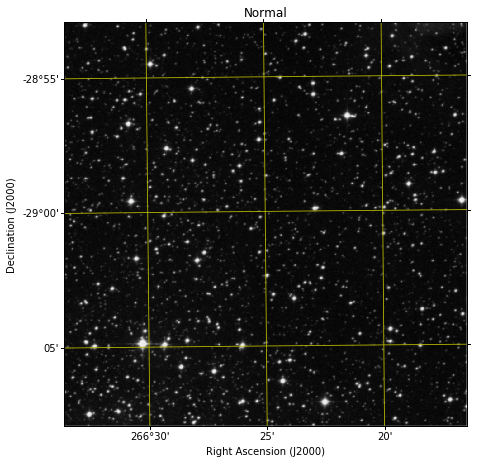

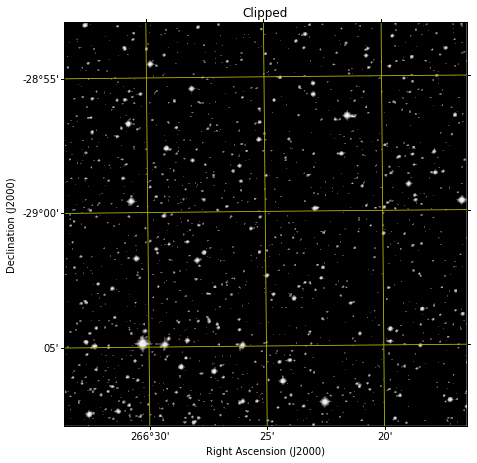

In [10]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection=gc_wcs)
fig1.set_size_inches(6,6)
fig1.tight_layout()

ax1.set_title("Normal")
ax1.grid(color='y', ls='-')
ax1.set_xlabel('Right Ascension (J2000)')
ax1.set_ylabel('Declination (J2000)')

ax1.imshow(gc_image_data, origin='lower', cmap=plt.cm.gray);

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection=gc_wcs)
fig2.set_size_inches(6,6)
fig2.tight_layout()

ax2.set_title("Clipped")
ax2.grid(color='y', ls='-')
ax2.set_xlabel('Right Ascension (J2000)')
ax2.set_ylabel('Declination (J2000)')

ax2.imshow(gc_copy_data, origin='lower', cmap=plt.cm.gray);

## Part 2:

- Pick a cool [Messier object](https://en.wikipedia.org/wiki/List_of_Messier_objects) with Declination  > 0.

* Download a DSS-2-infrared, DSS-2-red, and DSS-2-blue FITS images for the object.

- Create a pseudocolor RGB image from:

  * red = DSS-2-infrared
  * green = DSS-2-infrared
  * blue = DSS-2-blue

- You will have to experimant with the `stretch` to get a good image
* The image should be 10in x 10in, with labels.

In [88]:
## Crab Nebula M1
infrared_img = fits.getdata("./MyData/M1_Infrared.fits").astype(float)
red_img = fits.getdata("./MyData/M1_Red.fits").astype(float)
blue_img = fits.getdata("./MyData/M1_Blue.fits").astype(float)

clean_i = infrared_img - np.median(infrared_img)
clean_r = red_img - np.median(red_img)
clean_b = blue_img - np.median(blue_img)

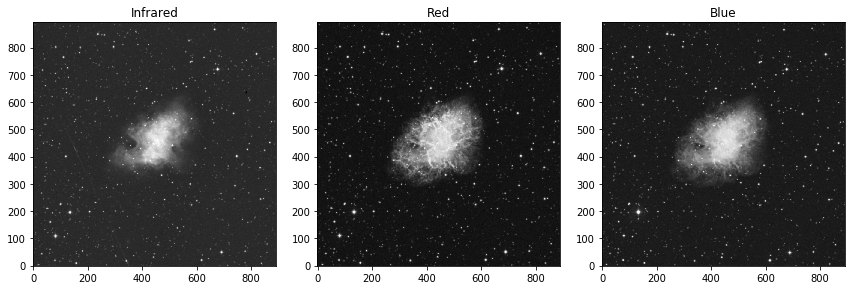

In [129]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].set_title("Infrared")
ax[1].set_title("Red")
ax[2].set_title("Blue")

ax[0].imshow(clean_i, origin='lower', cmap=plt.cm.gray)
ax[1].imshow(clean_r, origin='lower', cmap=plt.cm.gray);
ax[2].imshow(clean_b, origin='lower', cmap=plt.cm.gray);

In [11]:
m1_fits = fits.open("./MyData/M1_Red.fits")
image_header = m1_fits[0].header
wcs = WCS(image_header)

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


In [134]:
image = make_lupton_rgb(clean_i, clean_r, clean_b, stretch = 900)

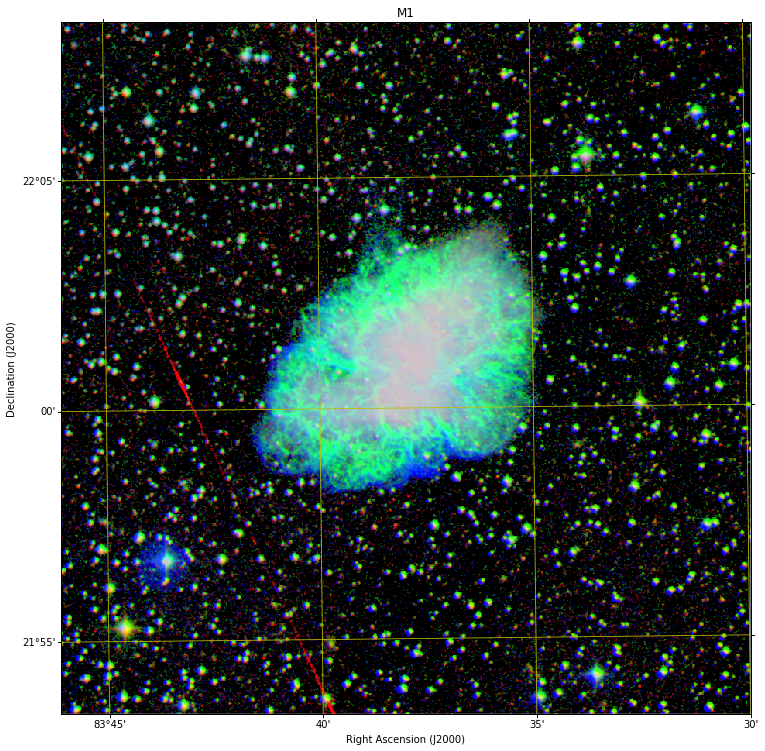

In [142]:
#fig, ax = plt.subplots(1,1)
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs)

fig.set_size_inches(10,10)
fig.tight_layout()

ax.set_title("M1")
ax.grid(color='y', ls='-')
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

ax.imshow(image, origin='lower', cmap=plt.cm.gray);

## Part 3

For the next Astro 300 class we are going to use an online interface to the LaTeX scientific typesetting system. 
To do this, you will need to sign up for a free account on the ShareLaTeX system before the next class.

* Remember your account name and password, we will use them during class. 

* Please use the following link to sign up for the system: https://www.sharelatex.com?r=f33161ec&rm=d&rs=b 

### Due Tue Nov 21 - 5pm

- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`  